### Chapter 5.2 
# Power Method

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

## Discrete-time Markov Chain
We consider a discrete-time Markov chain (DTMC): A stochastic process $\{X(t),\, t > 0\}$ is considered which has the Markov property at discrete (not necessarily equidistant) points in time $\{t_n, \, n=0,1,\dots\}$. Thus, we obtain a sequence of random variables $\{X(t_0), X(t_1), \dots \}$. The value of the next random variable $X(t_{n+1})$ depends only on the current random variable $X(t_n)$, but not on other random variables in the past (Markov property). This discrete-time stochastic process is denoted by $\{X(t_n),\, n=0,1,\dots\}$ and called a *discrete-time Markov process*. Thereby, the random variables $X(t_n)$ may be discrete or continuous. For the analysis of M/GI/1 and GI/M/1, the considered state space is the number of customers and therefore discrete. Such a discrete-time Markov process with discrete values is called *discrete-time Markov chain*.

For the M/GI/1 and GI/M/1 delay systems, the method of embedded Markov chain is used which provides a DTMC. 
A recursive equation which determines the state probability vector $\vec{X}_{n+1}$ of the next embedding point out of the current state probability vector $\vec{X}_{n}$:

$ \vec{X}_{n+1} = \vec{X}_{n} \cdot \matrix{P} $ ( general state transition equation )

which uses the transition probability matrix $\matrix{P}$.

## Power Method
A numerical robust method to derive the steady state probabilities $\vec{X}$ for DTMC is the *power method*. Starting from an initial vector for state probabilities $\vec{X}_{0}$ and using the general state transition equation to numerically determine the state vectors $\vec{X}_{1}, \dots, \vec{X}_{n}, \vec{X}_{n+1}$ at the embedding times $t_{1}, \ldots, t_{n}$, $t_{n+1}$, until the steady state is reached.

In practice, the statistical equilibrium is considered as reached by a predefined termination condition (e.g. if $|E[X(t_{n + 1})] - E[X(t_n)]| < \epsilon=10^{-6}$) which is checked after each iteration step. This *power method* is a numerically robust method for the analysis of state probabilities.

A requirement for the numerical computation in practice is a finite number of states. 

## Transition Matrix
We define a transition matrix $\matrix{P}$ (which corresponds to an M/GI/1 delay system with certain parameters, see the next notebook). The row-wise sum is one.

In [47]:
import numpy as np
import matplotlib.pyplot as plt

P = np.array([
       [0.43333333, 0.24555556, 0.13914815, 0.07885062, 0.04468202, 0.02531981, 0.01434789, 0.00813047, 0.00460727, 0.00261078, 0.0034141 ],
       [0.43333333, 0.24555556, 0.13914815, 0.07885062, 0.04468202, 0.02531981, 0.01434789, 0.00813047, 0.00460727, 0.00261078, 0.0034141 ],
       [0.        , 0.43333333, 0.24555556, 0.13914815, 0.07885062, 0.04468202, 0.02531981, 0.01434789, 0.00813047, 0.00460727, 0.00602489],
       [0.        , 0.        , 0.43333333, 0.24555556, 0.13914815, 0.07885062, 0.04468202, 0.02531981, 0.01434789, 0.00813047, 0.01063216],
       [0.        , 0.        , 0.        , 0.43333333, 0.24555556, 0.13914815, 0.07885062, 0.04468202, 0.02531981, 0.01434789, 0.01876263],
       [0.        , 0.        , 0.        , 0.        , 0.43333333, 0.24555556, 0.13914815, 0.07885062, 0.04468202, 0.02531981, 0.03311052],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.43333333, 0.24555556, 0.13914815, 0.07885062, 0.04468202, 0.05843033],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.43333333, 0.24555556, 0.13914815, 0.07885062, 0.10311235],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.43333333, 0.24555556, 0.13914815, 0.18196296],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.43333333, 0.24555556, 0.32111111],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.43333333, 0.56666667]
    ])


print(P.sum(axis=1)) # row-wise sum

[1.         1.         1.00000001 1.00000001 1.00000001 1.00000001
 1.00000001 1.00000001 1.         1.         1.        ]


## Visualization of the Power Method Iterations
The system is initialized with an empty system through proper definition of $X_0$. Then the iteration is conducted for several times and the resulting state probabilities at the embedding time instants are depicted.

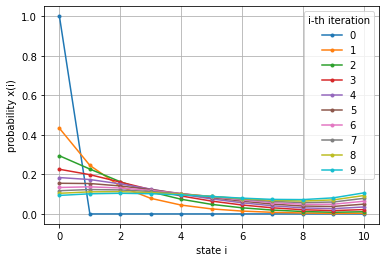

In [23]:
#%% Power Method
# initialize system
num_iter = 10 # number of iterations
X = np.zeros((len(P),num_iter))
X[0,0] = 1 
# iterate
for i in np.arange(1,num_iter):
    X[:,i] = X[:,i-1] @ P # matrix mulitplication

#%% Plot state probabilities
for i in range(num_iter):
    plt.plot(X[:,i],'.-', label=i)
plt.xlabel('state i')
plt.ylabel('probability x(i)')
plt.grid(which='major')
plt.legend(title='i-th iteration');

## Implementation of the Power Method
### Stop Condition 
Now, the iteration is continued until a certail stop condition is fulfilled. Typical examples for stop conditions are as follows.
* difference of means: $\left|E[X_{n+1}] - E[X_{n}] \, \right| < \epsilon$
* difference of standard deviations: $\left|Std[X_{n+1}] - Std[X_{n}] \, \right| < \epsilon$
* or combinations of means and standard deviations, or ...

In [34]:
#%% Definition of stop functions
def stopFunction_mean(X1, X_old, epsilon=1e-6):
    EX_old = X_old @ np.arange(len(P))  # first moment
    EX1 = X1 @ np.arange(len(P))
    return abs(EX_old-EX1) > epsilon 

def stopFunction_std(X1, X_old, epsilon=1e-6):
    EX_old = X_old @ np.arange(len(P))  # first moment
    EX_old_2 = X_old @ np.arange(len(P))**2  # second moment
    std_X_old = np.sqrt(EX_old_2 - EX_old**2)
    
    EX1 = X1 @ np.arange(len(P))
    EX1_2 = X1 @ np.arange(len(P))**2
    std_X1 = np.sqrt(EX1_2 - EX1**2)
    
    return abs(std_X_old-std_X1) > epsilon #or abs(EX_old-EX1) > epsilon 

### Power Method Definition
The implemenation of the power method is straightforward. It requires the start condition $X_0$ and the transition matrix $\mathcal{P}$ as well as a stopping condition.

In [36]:
def powerMethod(X0, P, stopFunction, epsilon=1e-3):
    X_old = np.zeros(len(P))
    X1 = X0    
    num = 0
    while stopFunction(X1, X_old, epsilon) or num<5: # at least 5 iterations
        X_old = X1
        X1 = X_old @ P # matrix mulitplication        
        num +=1
    return X1, num

### Example 
Two different stop conditions are used and the resulting system state probabilities at embedding time instants are plotted.

Mean: 65 iterations
Std: 108 iterations


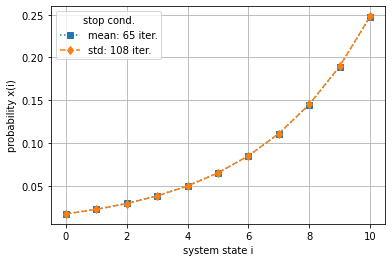

In [41]:
# call the power method
X0 = X[:,0] # start condition

X1, num1 =  powerMethod(X0, P, stopFunction_mean, epsilon=1e-3)
print(f'Mean: {num1} iterations')    

X2, num2 =  powerMethod(X0, P, stopFunction_std, epsilon=1e-5)
print(f'Std: {num2} iterations')       

# compare the results
plt.plot(X1,'s:', label=f'mean: {num1} iter.')
plt.plot(X2,'d--', label=f'std: {num2} iter.')
plt.xlabel('system state i')
plt.ylabel('probability x(i)')
plt.legend(title='stop cond.')
plt.grid(which='major')